# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [17]:
%run load_dataset.ipynb

In [18]:
all_subjects = []

for i in range(1013,1015):
    all_subjects.append(str(i))

for i in range(3001,3007):
    all_subjects.append(str(i))

In [19]:
X_all, y_all, subj_all, ts_all, hr_all = load_all_data(all_subjects)

Loading 1013's data
    sid raw_label                timestamp  duration  label
0  1001       ยืน  2562-01-14 14:52:31.027  00:00:30    NaN
1  1001      นั่ง  2562-01-14 14:53:07.042  00:00:30    NaN
2  1001       ยืน  2562-01-14 14:53:39.401  00:00:30    NaN
3  1001   ไม่ระบุ  2562-01-14 14:54:44.531  00:00:02    NaN
4  1001       นอน  2562-01-14 14:55:14.564  00:00:30    NaN
Loading 1014's data
    sid raw_label                timestamp  duration  label
0  1014     stand  2019-03-01 14:42:41.337  00:00:30    NaN
1  1014       sit  2019-03-01 14:43:14.660  00:00:30    NaN
2  1014     stand  2019-03-01 14:43:48.112  00:00:30    NaN
3  1014     sleep  2019-03-01 14:44:26.981  00:00:31    NaN
4  1014       sit  2019-03-01 14:45:04.234  00:00:30    NaN
Loading 3001's data
    sid raw_label                timestamp  duration  label
0  3001     stand  2019-03-05 10:03:24.582  00:00:31    NaN
1  3001       sit  2019-03-05 10:04:10.264  00:00:30    NaN
2  3001     stand  2019-03-05 10:04:54.5

# Data Preprocessing

In [20]:
%run preprocessing.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [114]:
print(X_all.shape, y_all.shape)

(5880, 3) (5880,)


In [71]:
X_all

array([[-2.99e-01, -9.04e-01, -6.11e-04],
       [-3.05e-01, -9.05e-01,  4.64e-03],
       [-3.01e-01, -9.02e-01,  2.69e-03],
       ...,
       [-9.39e-01,  9.14e-02,  3.29e-01],
       [-8.41e-01, -1.39e-01,  3.33e-01],
       [-8.66e-01, -1.12e-01,  3.68e-01]])

# Group Data by Label and Normalize Data

In [72]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [73]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [74]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

plotting  sit
(3, 374)
(3, 372)
(3, 379)
(0,)


IndexError: index 0 is out of bounds for axis 0 with size 0

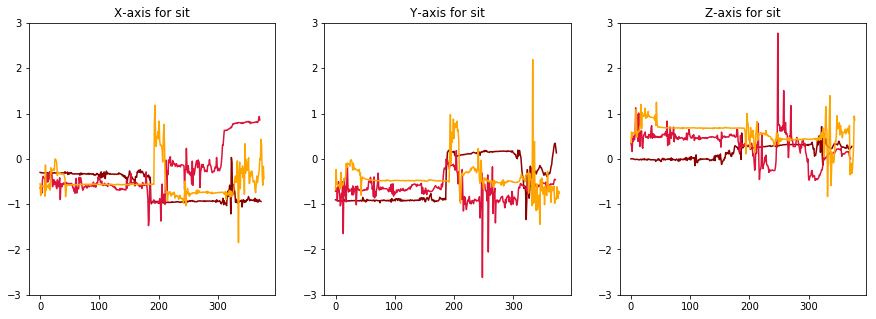

In [75]:
plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [ ]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

# Apply PCA

In [ ]:
# apply PCA and LDA to X_norm and rpy
X_pca, pca = apply_pca(X_all, y_all, label_list)
rpy_pca, pca_rpy = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [ ]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [ ]:
print(X_svm.shape, y_svm.shape)

# Reshape Data (Impure Label)

In [ ]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [ ]:
print(X_impure.shape, y_impure.shape)

# Split Train and Test Set

In [ ]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

In [ ]:
print(X_train.shape)
print(X_test.shape)

# SVM

In [ ]:
svm_model = svm_classifier(X_train, y_train)
print("Finished training")

In [ ]:
filename = 'model/svm_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
svm_model_2 = svm_classifier(X_tr, y_tr)
print("Finished training")

In [ ]:
y_pred_svm_2 = svm_model_2.predict(X_te)

## SVM Evaluation

In [115]:
%run eval_score.ipynb

In [ ]:
LABELS = ['sit','sleep','stand','walk']

In [ ]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

In [ ]:
acc = accuracy_score(y_te, y_pred_svm_2)
print(acc)

show_conf_matrix(y_te, y_pred_svm_2, LABELS)
show_clf_report(y_te, y_pred_svm_2, LABELS)

# Walk Algorithm

In [116]:
%run classifier_alg.ipynb

In [ ]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

In [ ]:
walk_lbl = ['NaN','walk']

In [ ]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [ ]:
y_pred_new = combine(X_test, y_pred_svm)

In [ ]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [188]:
%run test_model.ipynb

In [118]:
filename = 'model/svm_model.pkl'

model = pickle.load(open(filename,'rb'))

In [80]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

Loading 1001's data
Finished prediction


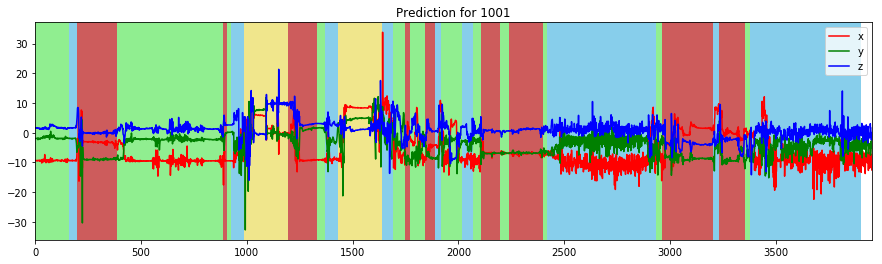

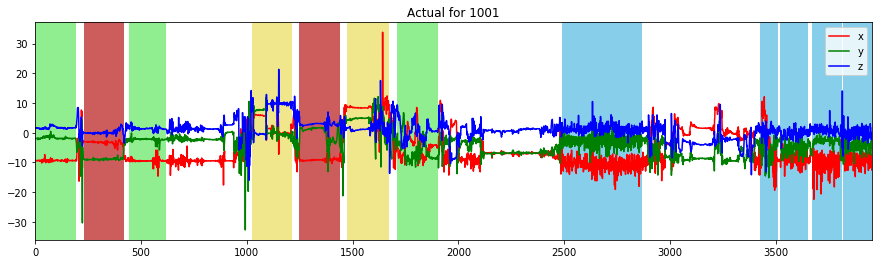

Loading 1002's data
Finished prediction


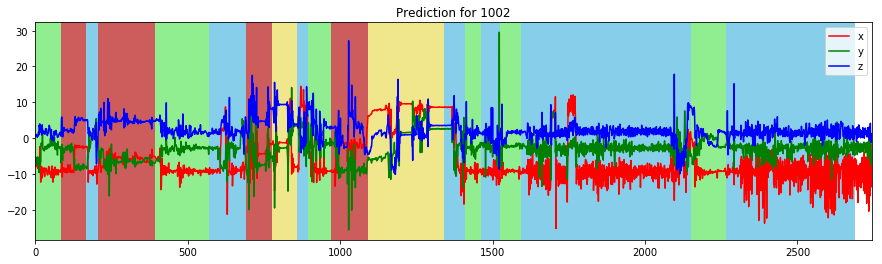

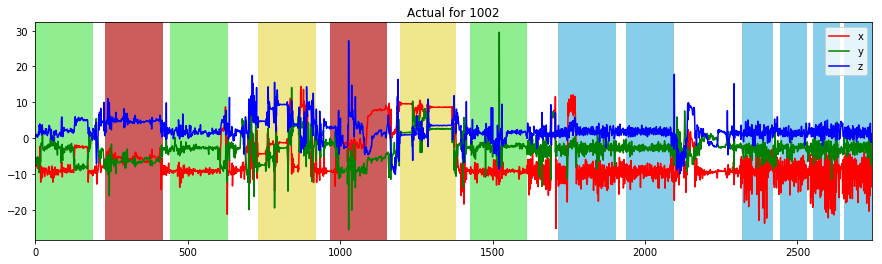

Loading 1003's data
Finished prediction


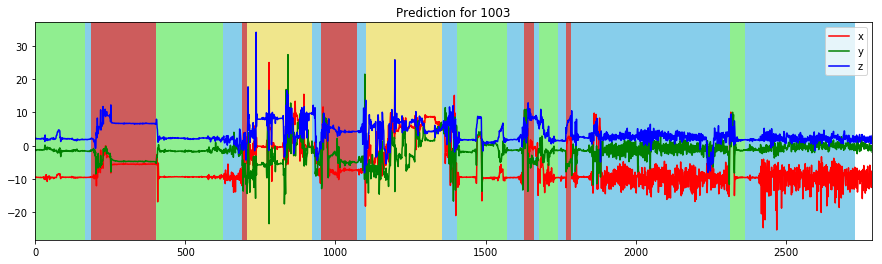

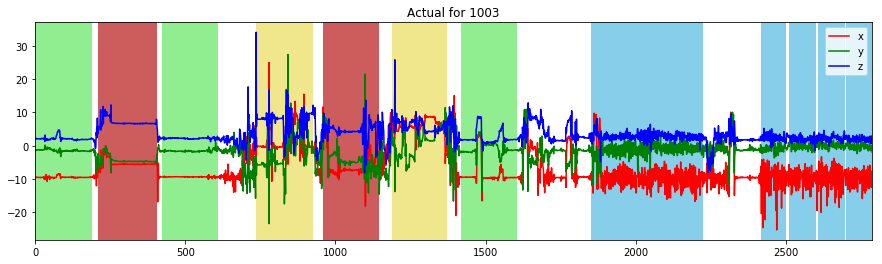

Loading 1004's data
Finished prediction


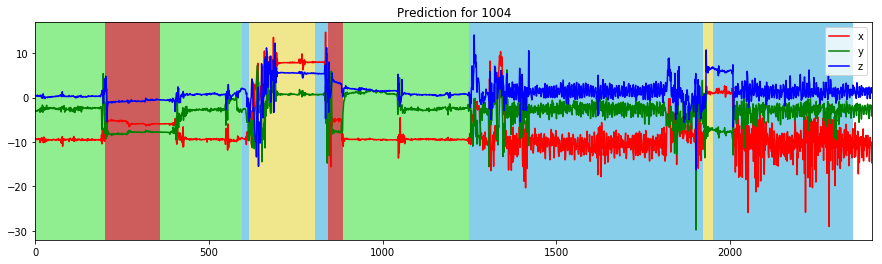

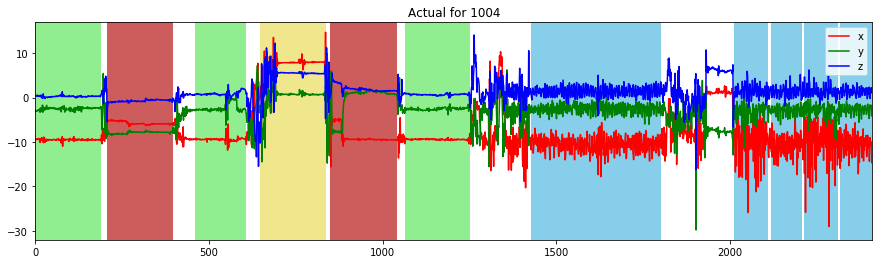

Loading 1005's data
Finished prediction


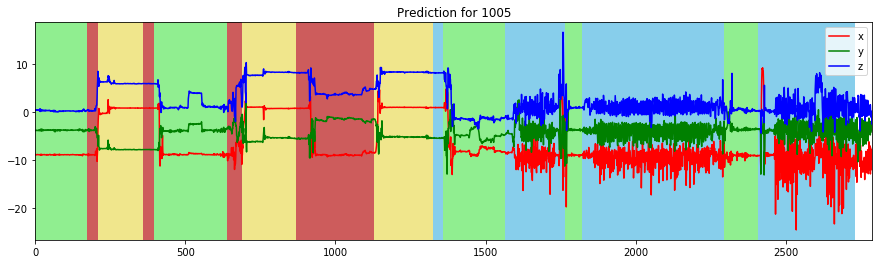

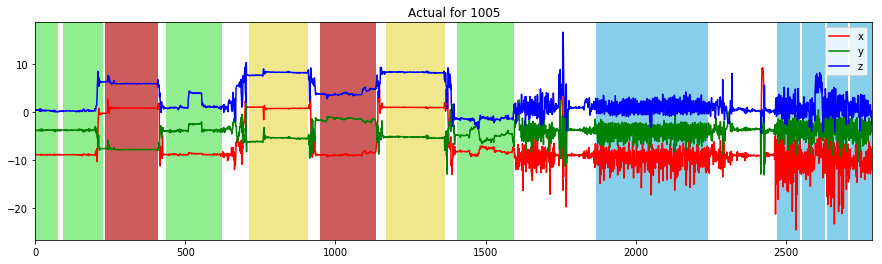

Loading 1006's data
Finished prediction


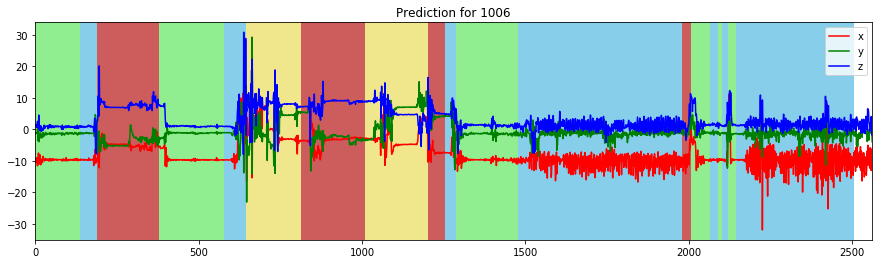

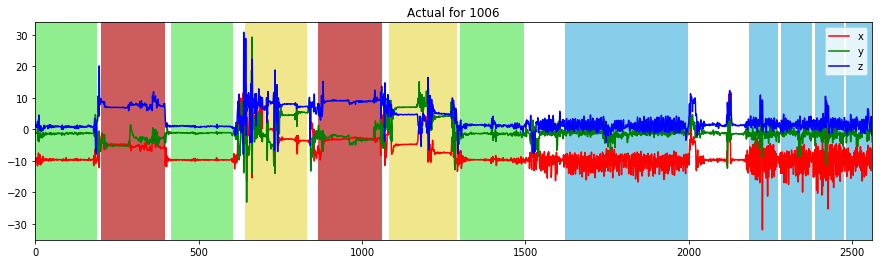

Loading 1007's data
Finished prediction


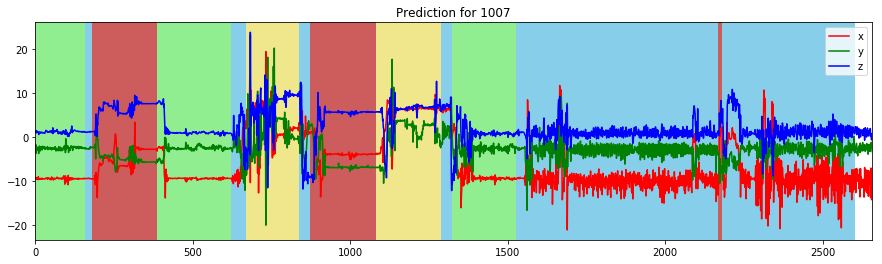

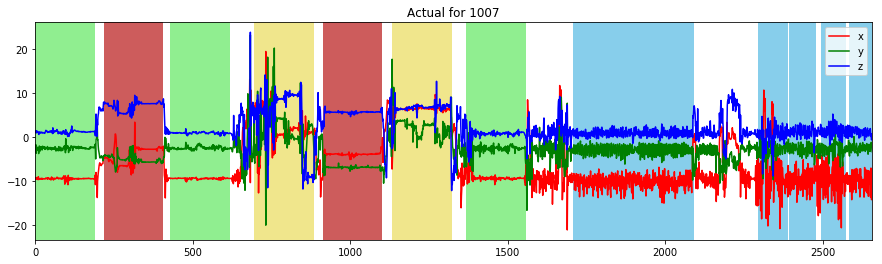

Loading 1008's data
Finished prediction


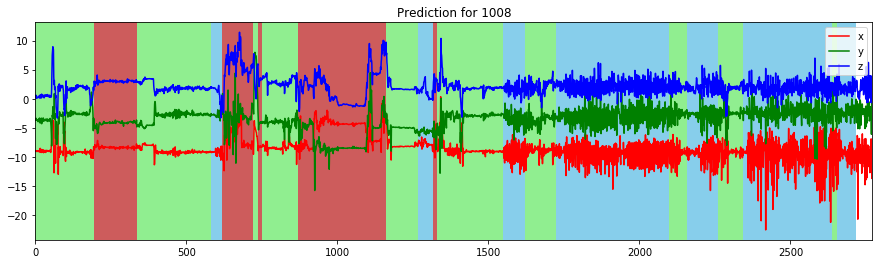

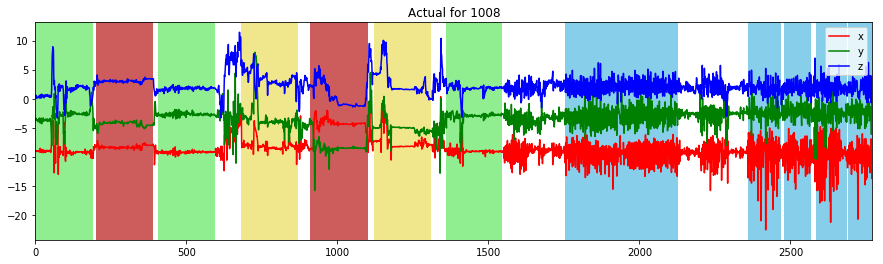

Loading 2001's data
Finished prediction


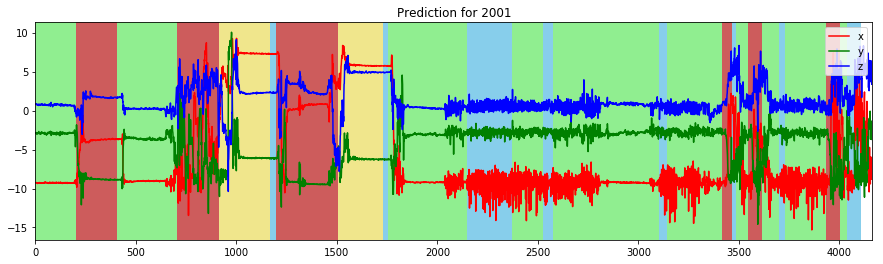

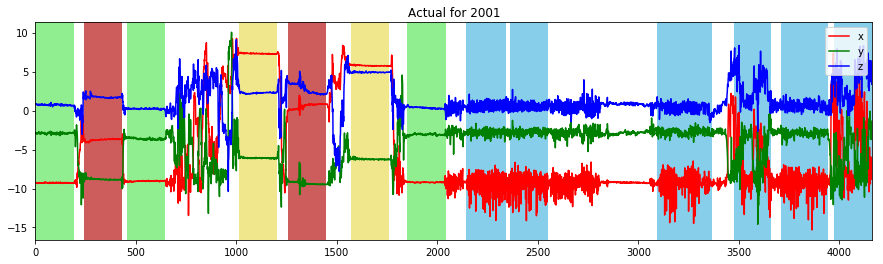

Loading 2002's data
Finished prediction


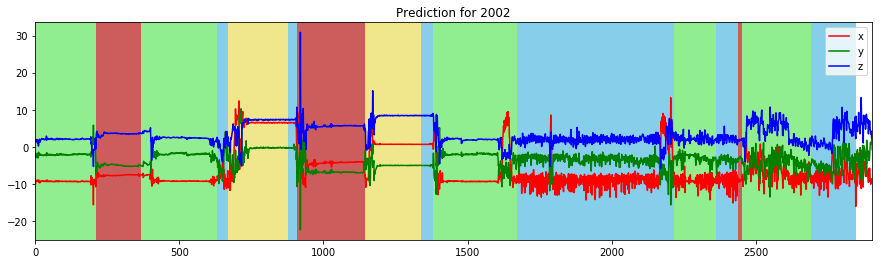

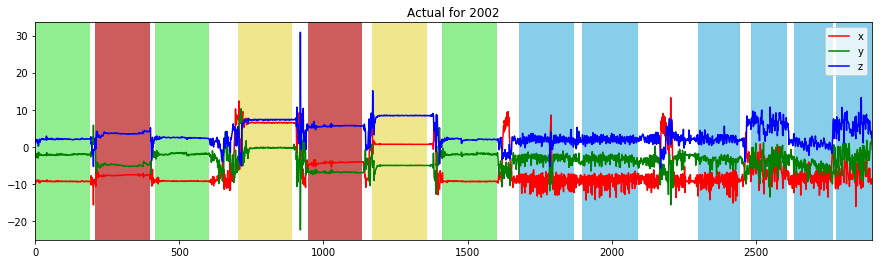

In [81]:
call_functions(all_subjects)

Loading 3001's data
Finished prediction


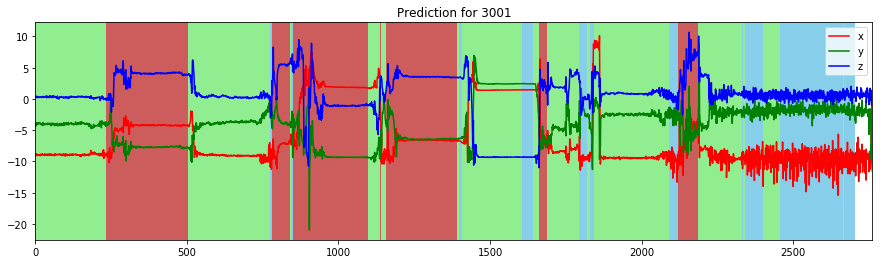

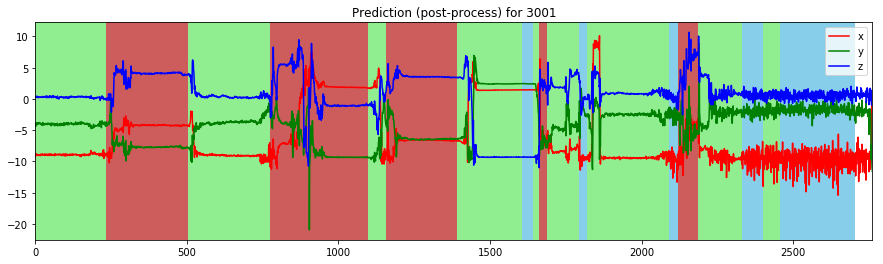

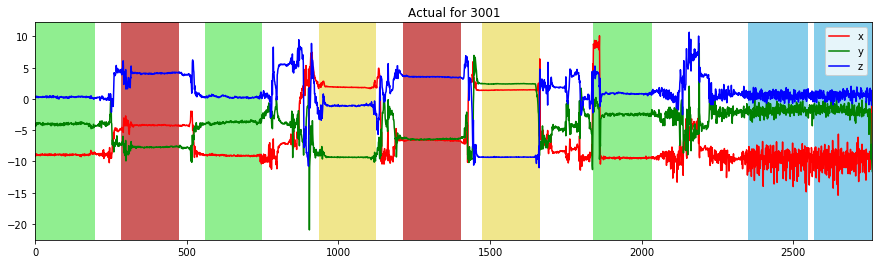

0.728440366972477


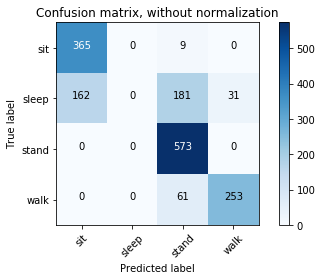

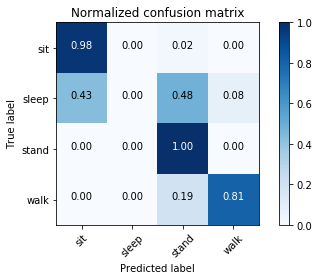

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.69      0.98      0.81       374
       sleep       0.00      0.00      0.00       374
       stand       0.70      1.00      0.82       573
        walk       0.89      0.81      0.85       314

   micro avg       0.73      0.73      0.73      1635
   macro avg       0.57      0.70      0.62      1635
weighted avg       0.57      0.73      0.64      1635

Loading 3002's data
Finished prediction


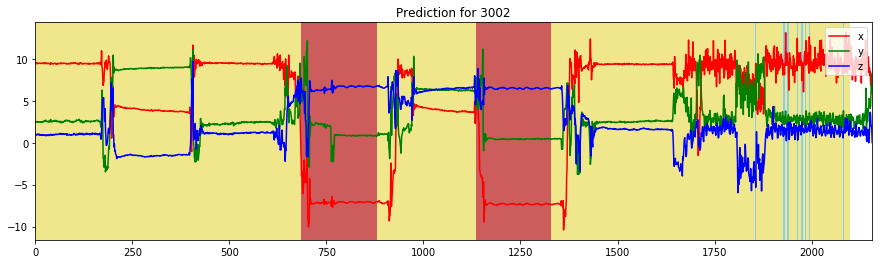

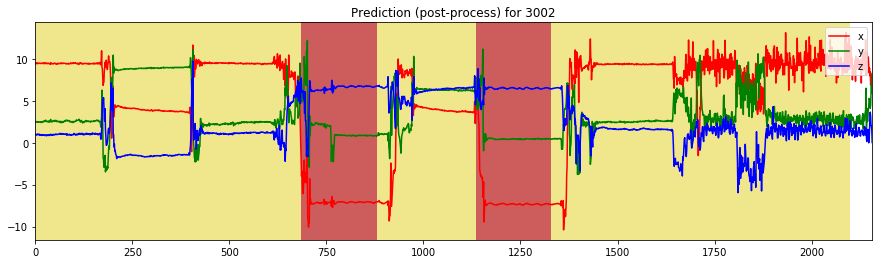

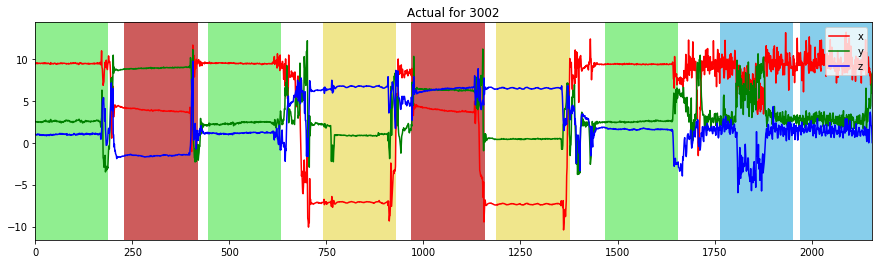

0.07204433497536945


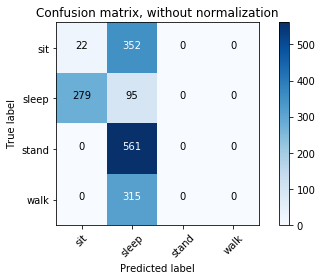

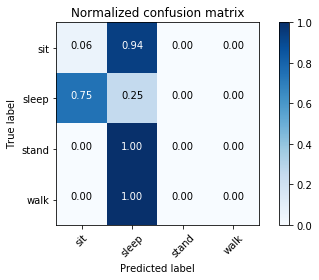

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.07      0.06      0.07       374
       sleep       0.07      0.25      0.11       374
       stand       0.00      0.00      0.00       561
        walk       0.00      0.00      0.00       315

   micro avg       0.07      0.07      0.07      1624
   macro avg       0.04      0.08      0.04      1624
weighted avg       0.03      0.07      0.04      1624

Loading 3003's data
Finished prediction


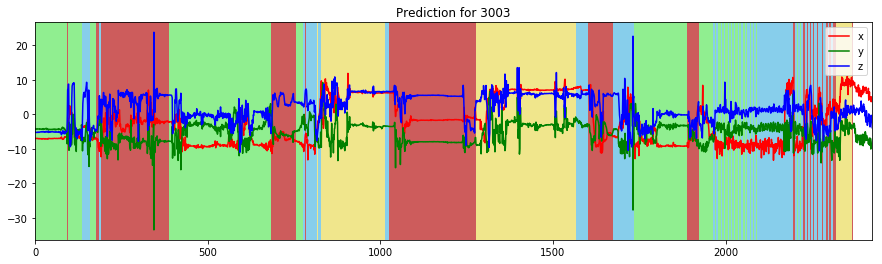

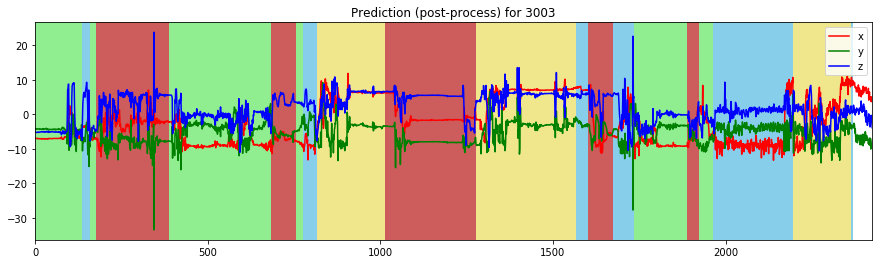

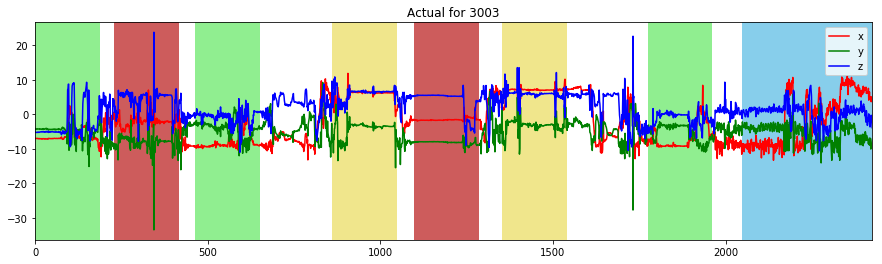

0.8106107341147439


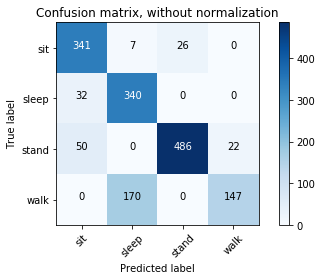

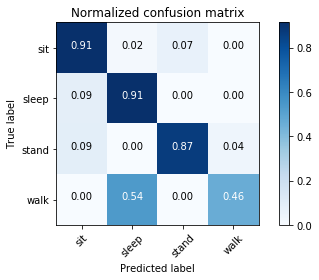

              precision    recall  f1-score   support

         sit       0.81      0.91      0.86       374
       sleep       0.66      0.91      0.76       372
       stand       0.95      0.87      0.91       558
        walk       0.87      0.46      0.60       317

   micro avg       0.81      0.81      0.81      1621
   macro avg       0.82      0.79      0.78      1621
weighted avg       0.83      0.81      0.80      1621

Loading 3004's data
Finished prediction


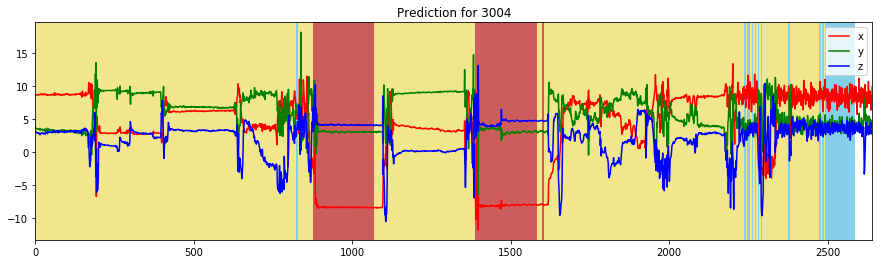

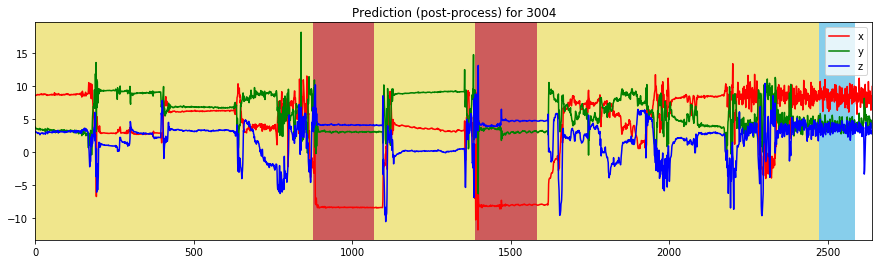

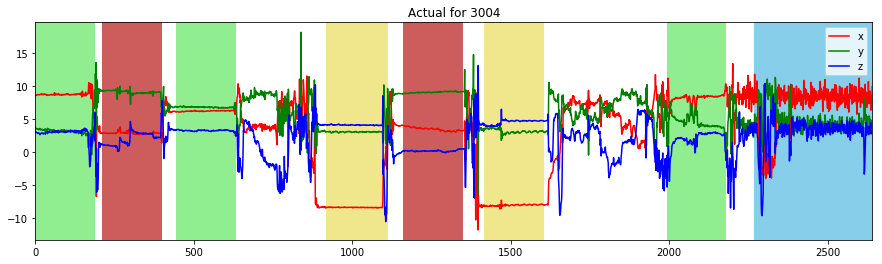

0.10558624923265807


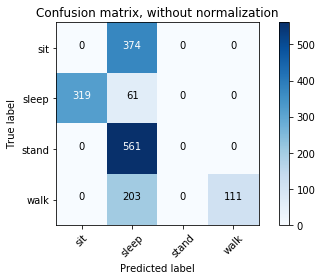

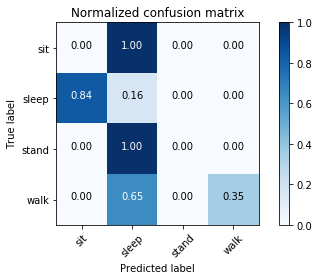

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.00      0.00      0.00       374
       sleep       0.05      0.16      0.08       380
       stand       0.00      0.00      0.00       561
        walk       1.00      0.35      0.52       314

   micro avg       0.11      0.11      0.11      1629
   macro avg       0.26      0.13      0.15      1629
weighted avg       0.20      0.11      0.12      1629

Loading 3005's data
Finished prediction


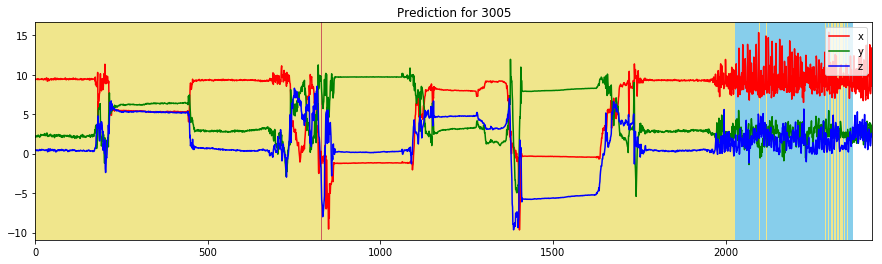

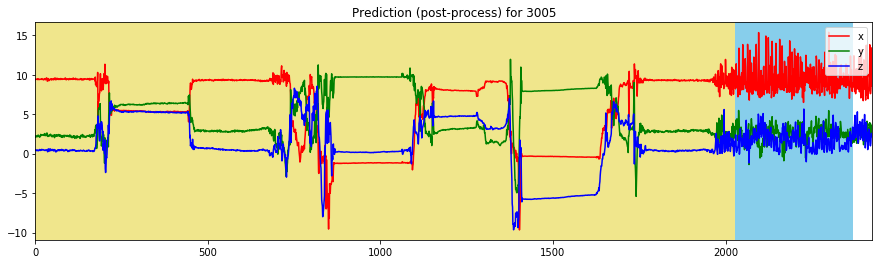

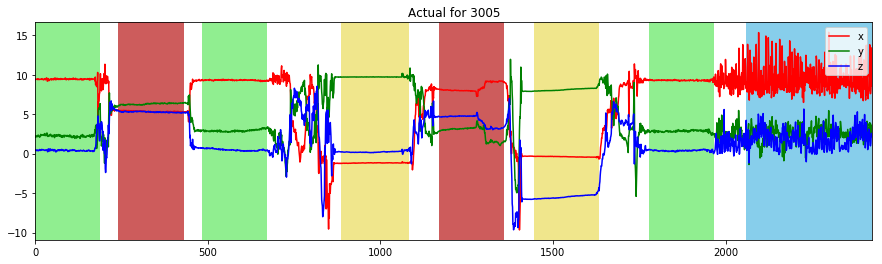

0.37416331994645247


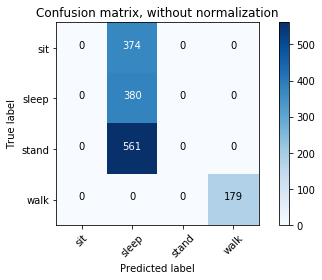

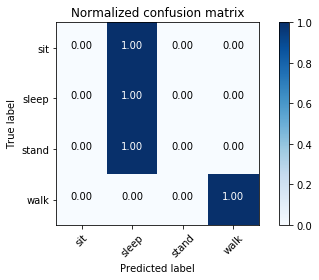

              precision    recall  f1-score   support

         sit       0.00      0.00      0.00       374
       sleep       0.29      1.00      0.45       380
       stand       0.00      0.00      0.00       561
        walk       1.00      1.00      1.00       179

   micro avg       0.37      0.37      0.37      1494
   macro avg       0.32      0.50      0.36      1494
weighted avg       0.19      0.37      0.23      1494



/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [189]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects)

Finished prediction


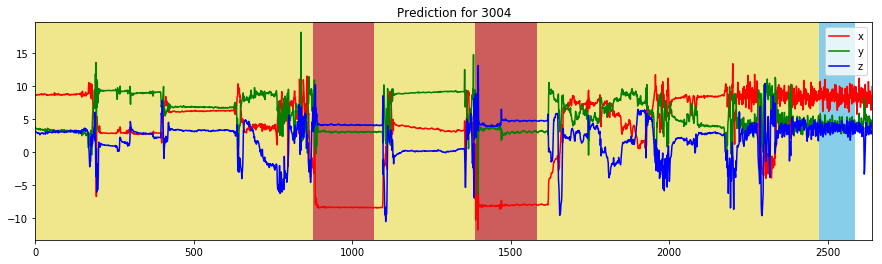

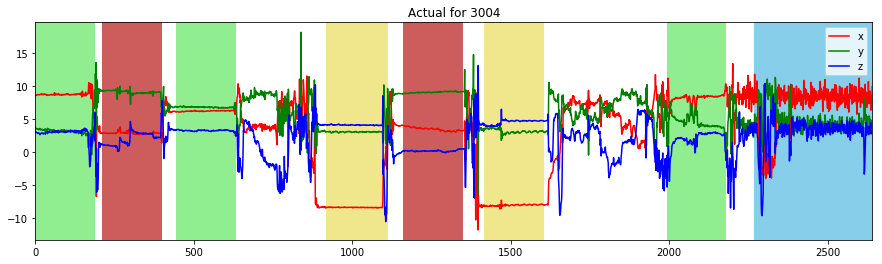

In [125]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pp_periods, actual_periods)

# Display Table

In [119]:
from prettytable import PrettyTable

In [137]:
print(s)
print(df_y)

3004
                    timestamp  y_pred y_actual
0     2019-03-05 12:47:14.237       1        2
1     2019-03-05 12:47:14.399       1        2
2     2019-03-05 12:47:14.558       1        2
3      2019-03-05 12:47:14.72       1        2
4     2019-03-05 12:47:14.879       1        2
5     2019-03-05 12:47:15.042       1        2
6     2019-03-05 12:47:15.201       1        2
7     2019-03-05 12:47:15.362       1        2
8     2019-03-05 12:47:15.522       1        2
9     2019-03-05 12:47:15.683       1        2
10    2019-03-05 12:47:15.843       1        2
11    2019-03-05 12:47:16.004       1        2
12    2019-03-05 12:47:16.166       1        2
13    2019-03-05 12:47:16.325       1        2
14    2019-03-05 12:47:16.487       1        2
15    2019-03-05 12:47:16.648       1        2
16    2019-03-05 12:47:16.809       1        2
17    2019-03-05 12:47:16.967       1        2
18    2019-03-05 12:47:17.129       1        2
19    2019-03-05 12:47:17.288       1        2
20    20

In [129]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [133]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [134]:
print(t)

+-------------------------+-------------------------+-------+
|          start          |           end           |  pred |
+-------------------------+-------------------------+-------+
| 2019-03-05 12:47:14.237 | 2019-03-05 12:49:34.293 | sleep |
| 2019-03-05 12:49:34.453 | 2019-03-05 12:50:05.935 |  sit  |
| 2019-03-05 12:50:06.092 | 2019-03-05 12:50:56.362 | sleep |
| 2019-03-05 12:50:56.522 | 2019-03-05 12:51:28.327 |  sit  |
+-------------------------+-------------------------+-------+


In [190]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

4
[['sit', 2], ['sleep', 2], ['stand', 0], ['walk', 0]]


In [191]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [192]:
print(tabl_act_chng)

+---------------+------------------+
|     Label     | Activities Count |
+---------------+------------------+
|      sit      |        2         |
|     sleep     |        2         |
|     stand     |        0         |
|      walk     |        0         |
|               |                  |
| total changes |        4         |
+---------------+------------------+


## Active Inactive AC (ALL)

In [174]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [175]:
print(tabl_act)

+----------+------------------+
|  Label   | Activities Count |
+----------+------------------+
| Inactive |        4         |
|  Active  |        0         |
+----------+------------------+


# Convert Time to String Method

In [159]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [194]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [168]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [195]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

Prediction
+-------+---------+------------+----------------+
| Label | Minutes | Percentage | Activity Count |
+-------+---------+------------+----------------+
|  sit  |   1:03  |   24.954   |       2        |
| sleep |   3:10  |   75.046   |       2        |
| stand |   0:00  |    0.0     |       0        |
|  walk |   0:00  |    0.0     |       0        |
|       |         |            |                |
| total |   4:13  |   100.0    |       4        |
+-------+---------+------------+----------------+
Actual
+-------+---------+------------+
| Label | Minutes | Percentage |
+-------+---------+------------+
|  sit  |   1:00  |   22.14    |
| sleep |   1:01  |   22.509   |
| stand |   1:30  |   33.21    |
|  walk |   1:00  |   22.14    |
|       |         |            |
| total |   4:31  |   99.999   |
+-------+---------+------------+


# Bar Chart for Every 5 Minutes

In [143]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [144]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

12:45:0.0 12:55:0.0


In [145]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [148]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

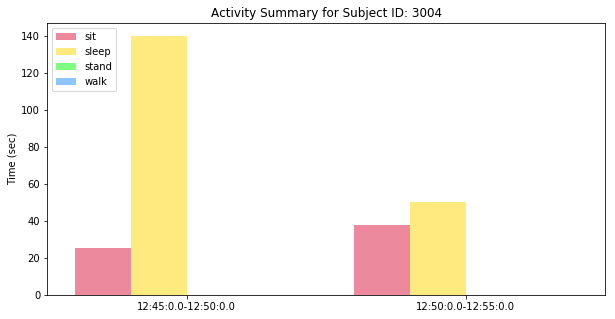

In [150]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()